In [1]:
import csv
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

RANDOM_SEED = 33

c:\Users\jesus\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset ='landmarks.csv'

NUM_CLASSES  = 18


In [4]:
X_dataset = np.loadtxt(dataset,delimiter =',',dtype='float32',usecols=list(range(1,(21*2)+1)))
Y_dataset = np.loadtxt(dataset,delimiter =',',dtype='int32',usecols=(0))
X_train,X_test,Y_train,Y_test = train_test_split(X_dataset,Y_dataset,train_size=0.75,random_state=RANDOM_SEED)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 18)                198       
                                                                 
Total params: 1268 (4.95 KB)
Trainable params: 1268 (4.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
model.fit(
    X_train,
    Y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, Y_test)
    
)

Epoch 1/1000
10/10 [==============================] - 1s 35ms/step - loss: 2.9856 - accuracy: 0.0521 - val_loss: 2.9042 - val_accuracy: 0.0453
Epoch 2/1000
10/10 [==============================] - 0s 10ms/step - loss: 2.9507 - accuracy: 0.0630 - val_loss: 2.8869 - val_accuracy: 0.0630
Epoch 3/1000
10/10 [==============================] - 0s 9ms/step - loss: 2.9294 - accuracy: 0.0546 - val_loss: 2.8748 - val_accuracy: 0.0932
Epoch 4/1000
10/10 [==============================] - 0s 9ms/step - loss: 2.9091 - accuracy: 0.0563 - val_loss: 2.8661 - val_accuracy: 0.0856
Epoch 5/1000
10/10 [==============================] - 0s 9ms/step - loss: 2.8818 - accuracy: 0.0655 - val_loss: 2.8562 - val_accuracy: 0.0957
Epoch 6/1000
10/10 [==============================] - 0s 9ms/step - loss: 2.8745 - accuracy: 0.0663 - val_loss: 2.8441 - val_accuracy: 0.0982
Epoch 7/1000
10/10 [==============================] - 0s 9ms/step - loss: 2.8653 - accuracy: 0.0831 - val_loss: 2.8326 - val_accuracy: 0.1335
Epoc

In [8]:
val_loss, val_acc = model.evaluate(X_test, Y_test, batch_size=128)

4/4 [==============================] - 0s 8ms/step - loss: 1.4902 - accuracy: 0.6071


13/13 [==============================] - 0s 2ms/step


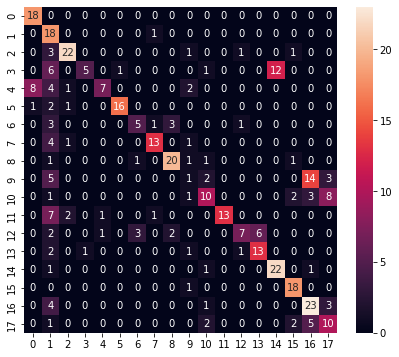

Classification Report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        18
           1       0.28      0.95      0.43        19
           2       0.81      0.79      0.80        28
           3       0.83      0.20      0.32        25
           4       0.78      0.32      0.45        22
           5       0.94      0.80      0.86        20
           6       0.56      0.38      0.45        13
           7       0.81      0.68      0.74        19
           8       0.80      0.80      0.80        25
           9       0.11      0.04      0.06        25
          10       0.56      0.40      0.47        25
          11       1.00      0.54      0.70        24
          12       0.70      0.33      0.45        21
          13       0.68      0.72      0.70        18
          14       0.65      0.88      0.75        25
          15       0.75      0.95      0.84        19
          16       0.50      0.74      0.60        31
     

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(Y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(Y_test, y_pred)  